In [1]:
from functools import reduce

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('seaborn')


# Preprocess data

In [2]:

ecological = pd.read_csv("./Data/countries.csv")
happiness = pd.read_csv("./Data/2016.csv")
data = reduce(lambda left, right: pd.merge(left, right, on='Country'), [ecological, happiness])

print(data.isnull().values.any()) # Check if any contain NaNs
data[data.isna().any(axis=1)] # Display which ones contain NaN

data = data.dropna(how='any')

data.to_csv('./Data/data.csv', index = False)


True


# Import CSV


In [3]:
data = pd.read_csv("./Data/data.csv")
data['GDP per Capita'] = data['GDP per Capita'].replace('[\$,]', '', regex=True).astype(float)


# Plot correlation between amount of land type and footprint of that type

The countries with the most fishing water are likely to have the largest fish footprint, and a country with no fishing water cannot possibly have any fish footprint.

This leads us to ask, <em>"Is there a  'normal' footprint/sq.ft of each type of land?"</em>

How much do countries tend to create footprint from their type of land and which countries are outliers? Understanding this will give us a better idea of which countries have low footprints despite having a lot of land. 

With this data, we can dig into why outlier countries overperform in ecological conscientiousness. Asking questions about whether region, economic growth, and mental state are reasons for why these countries overperform.

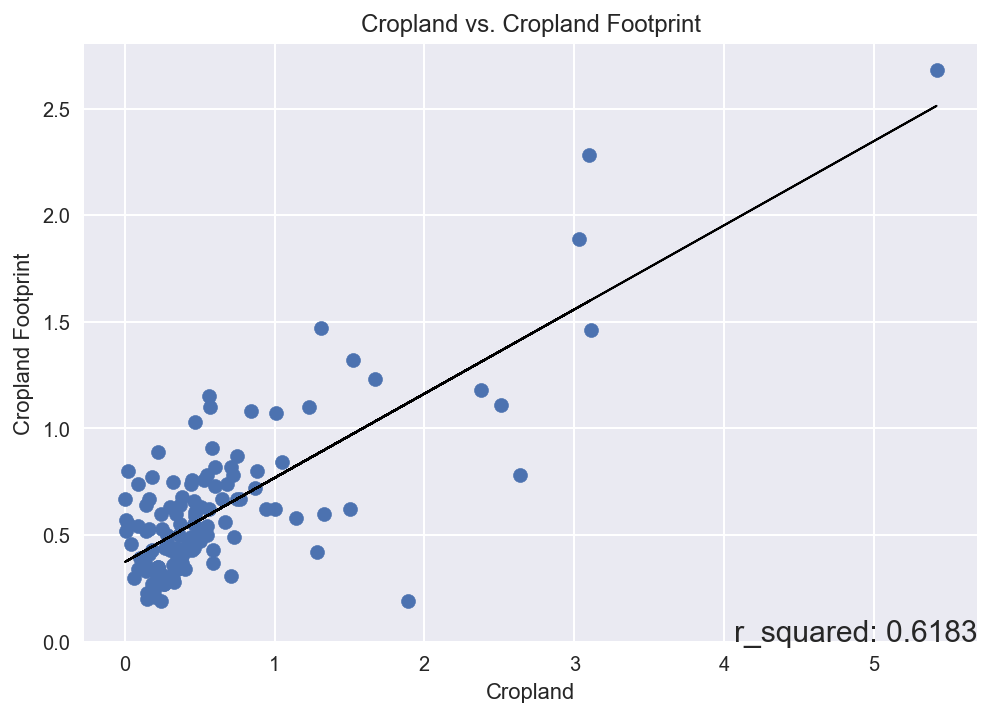

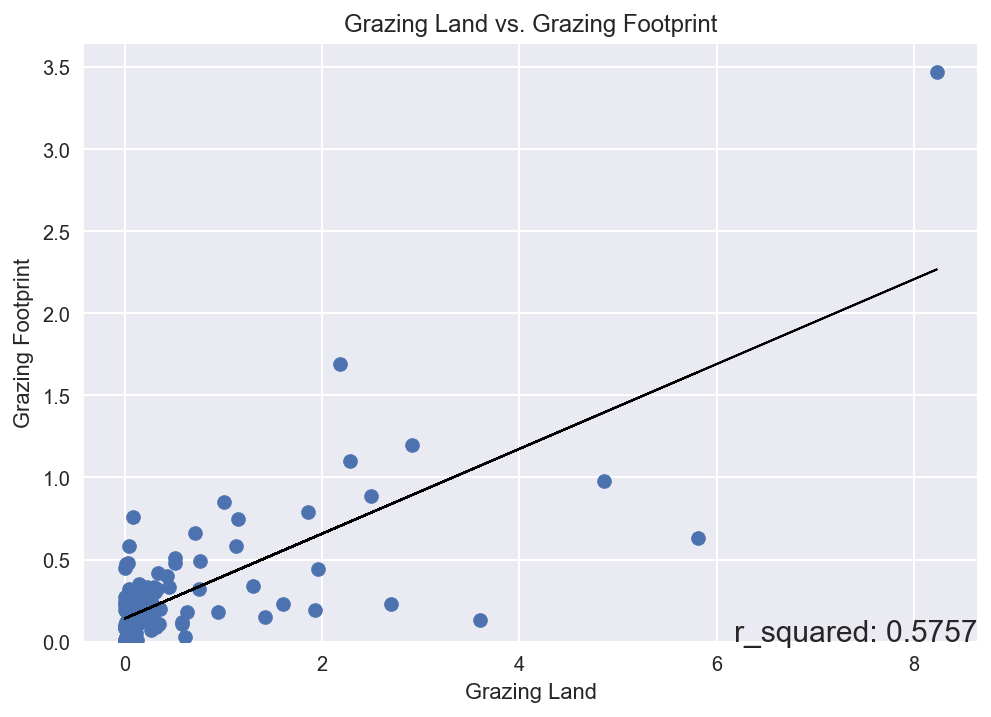

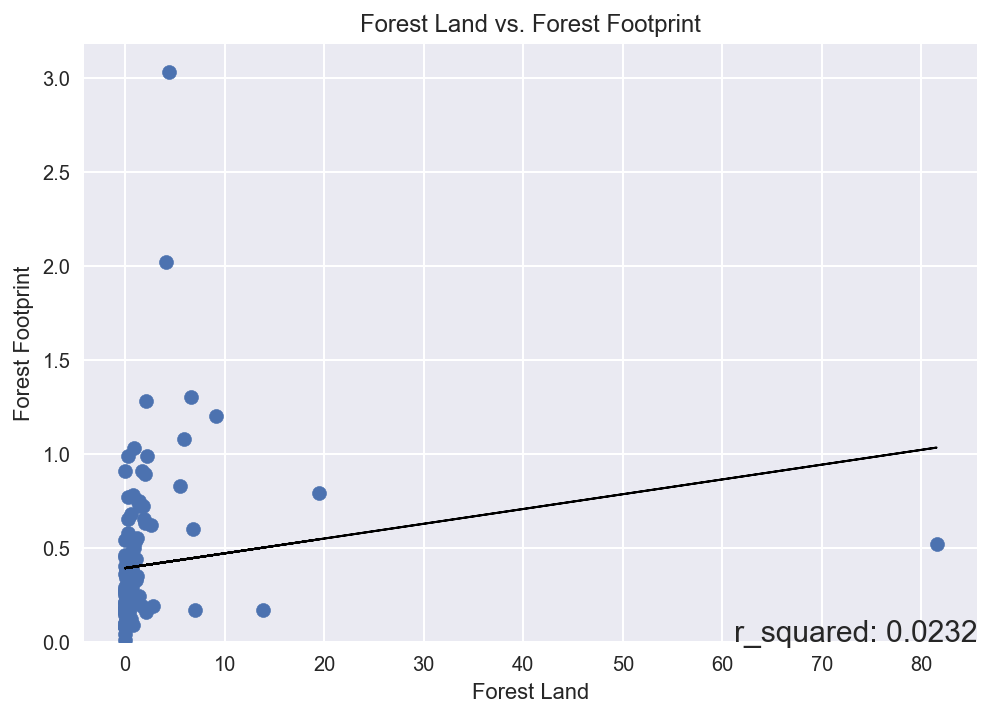

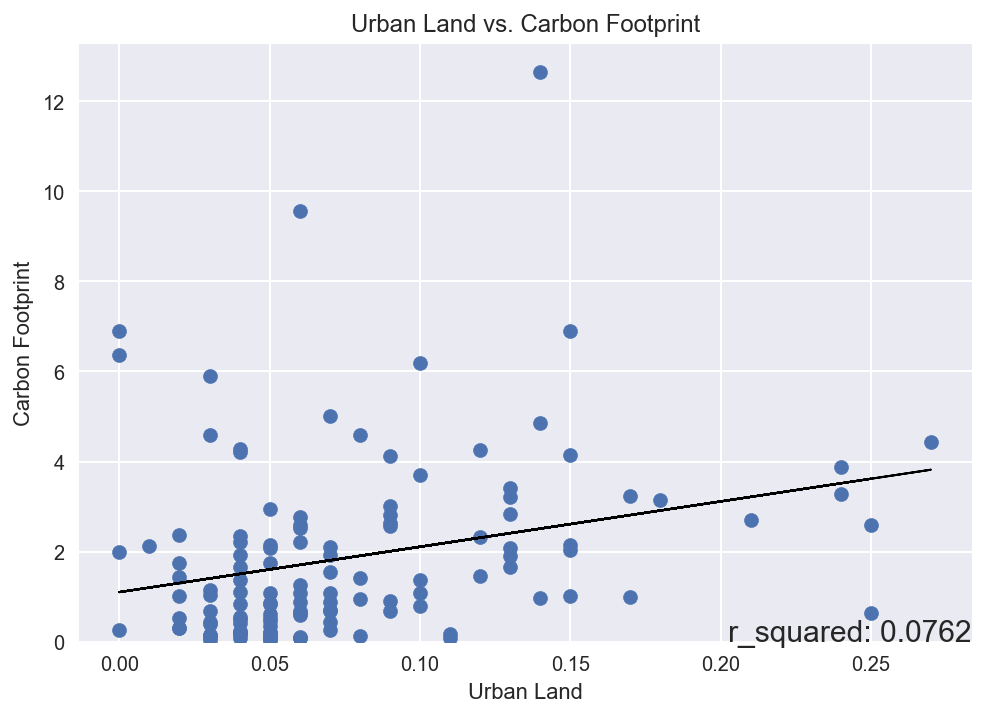

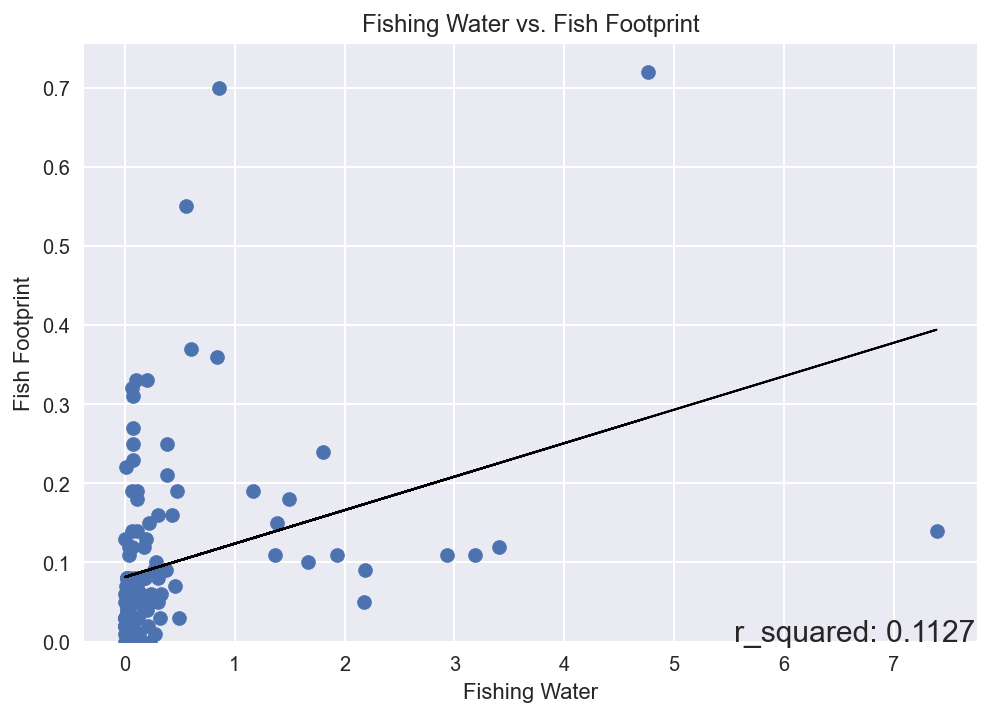

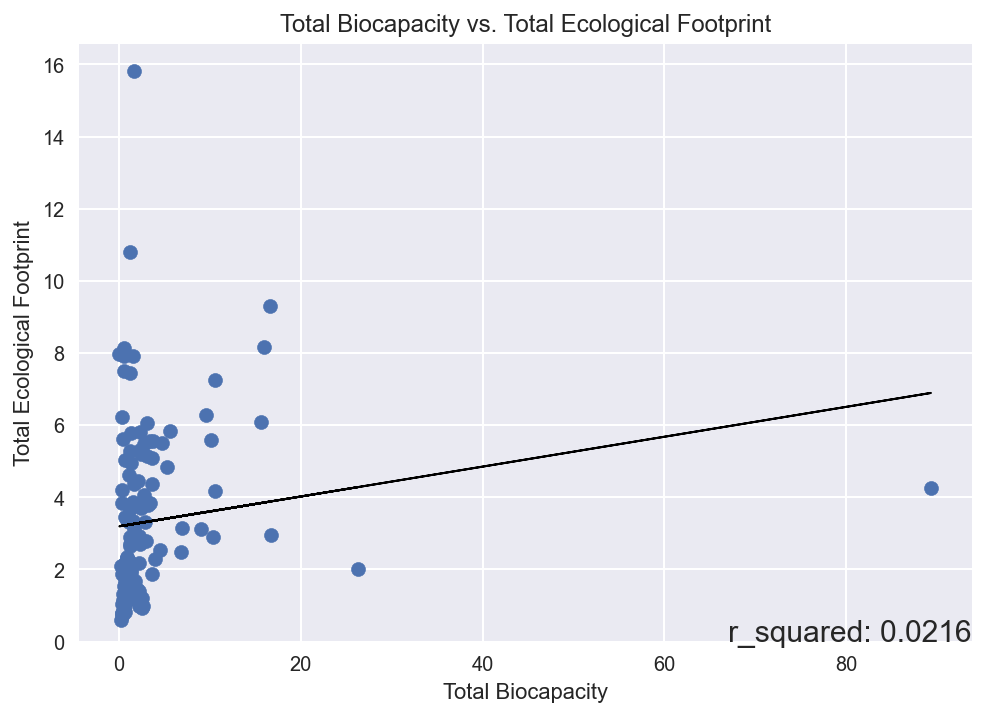

In [4]:

lands = ['Cropland', 'Grazing Land', 'Forest Land','Urban Land', 'Fishing Water', 'Total Biocapacity']
fps = ['Cropland Footprint', 'Grazing Footprint', 'Forest Footprint', 'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint']

for i, (land, footprint) in enumerate(list(zip(lands, fps))):
    
    # Plot scatter of area type vs footprint for all countries
    plt.scatter(data[land].values, data[footprint].values)
    plt.xlabel(land)
    plt.ylabel(footprint)
    
    # fit linear regression line and plot correlation
    inputs = data[land].values.reshape(-1, 1)
    outputs = data[footprint].values
    
    regr = linear_model.LinearRegression()
    regr.fit(inputs, outputs)    
    preds = regr.predict(inputs)
  
    # plot correlation with r^2 value
    plt.plot(inputs, preds, color='black', linewidth=1)
    plt.title(f'{land} vs. {footprint}')
    
    # make sure text appears in similar location on all plots
    xcoo = max(inputs)*0.75
    ycoo = max(inputs)*0.05
    plt.ylim(bottom=0)
    plt.text(xcoo,0,f"r_squared: {r2_score(outputs, preds):.4f}", fontsize=15)
    
    plt.show()
#     break

In [5]:
"""
Manually identified visual outliers
"""
for i, (land, footprint) in enumerate(list(zip(lands, fps))):
    if i != 4: continue
    # Plot scatter of area type vs footprint for all countries
#     (data[land].values, data[footprint].values)
    
    print(data.sort_values(land,ascending=False)[['Country', land, footprint]])

#     print(data[data[footprint] < 1.0].sort_values(land, ascending=False)[['Country', land, footprint]])
    
    break
    

         Country  Fishing Water  Fish Footprint
107     Suriname           7.39            0.14
80       Namibia           4.76            0.72
23        Canada           3.41            0.12
6      Australia           3.19            0.11
40         Gabon           2.93            0.11
..           ...            ...             ...
58        Jordan           0.00            0.03
67    Luxembourg           0.00            0.13
85         Niger           0.00            0.02
99        Serbia           0.00            0.02
0    Afghanistan           0.00            0.00

[127 rows x 3 columns]


# Manually identified best and worst countries in each area
## Cropland vs Cropland Footprint

**R<sup>2</sup>: 0.6183**

No visual outliers

Inline: Australia

## Grazing land vd grazing Footprint

**R<sup>2</sup>: 0.5757**

3 underperformers: Australia, Uruguay, Gabon

1 outperformer: Bolivia

1 super-outperformer: Mongolia

## Forest Land vs forest Footprint

**R<sup>2</sup>: 0.0232**

1 super-underperformer: Suriname

1 underperformer: Bolivia

2 super-overperformers: Bhutan, Latvia

## Urban land vs Carbon Footprint

**R<sup>2</sup>: 0.0762**

1 underperformer: Bhutan

many overperformers: 'Qatar' 'Trinidad and Tobago' 'Kuwait , 'United Arab Emirates' 'Bahrain'

1 super overperformer: Luxembourg

## Fishing water vs Fish Footprint

**R<sup>2</sup>: 0.1176**

2 underperformers: Suriname, Canada

3 super overperformers: Namibia, New Zealand, Mauritius